### **Import Libraries**

In [42]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### **Datasets and Parameters**

In [36]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 8
EPOCHS = 50
DATASET_PATH = 'Soil types/'
MODEL_PATH = 'cnn.keras'

### **Data Augmentation and Preprocessing**

In [28]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

### **Train & Validation Generators**

In [29]:
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation'
)

class_names = list(train_generator.class_indices.keys())

print(f"Classes: {class_names}")

Found 126 images belonging to 5 classes.


Found 30 images belonging to 5 classes.
Classes: ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


### **Visualize Sample Images**

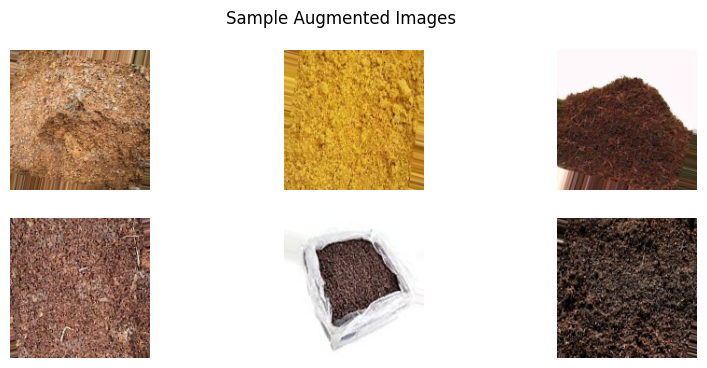

In [30]:
images, _ = next(train_generator)
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis("off")

plt.suptitle("Sample Augmented Images")
plt.show()

### **Build the CNN Model**

In [31]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(units=128, activation='relu'),

    Dropout(rate=0.4),

    Dense(units=train_generator.num_classes, activation='softmax')
])

### **Compile and Train the Model**

In [32]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    #callbacks=[early_stop]
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.1866 - loss: 1.9688 - val_accuracy: 0.3667 - val_loss: 1.3599
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.4097 - loss: 1.3092 - val_accuracy: 0.3667 - val_loss: 1.0718
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.4211 - loss: 1.0814 - val_accuracy: 0.4667 - val_loss: 0.8687
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.5160 - loss: 0.9972 - val_accuracy: 0.8333 - val_loss: 0.6973
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.6313 - loss: 0.8750 - val_accuracy: 0.7000 - val_loss: 0.8321
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7095 - loss: 0.8016 - val_accuracy: 0.8667 - val_loss: 0.4966
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7645 - loss: 0.6079 - val_accuracy: 0.7333 - val_loss: 0.7417
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.8442 - loss: 0.5062 - val_accuracy: 0.

### **Model Summary and Save Trained Model**

In [33]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,486,993 (55.26 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,657,996 (36.84 MB)

In [37]:
cnn.save(MODEL_PATH)

### **Evaluate Model Performance**

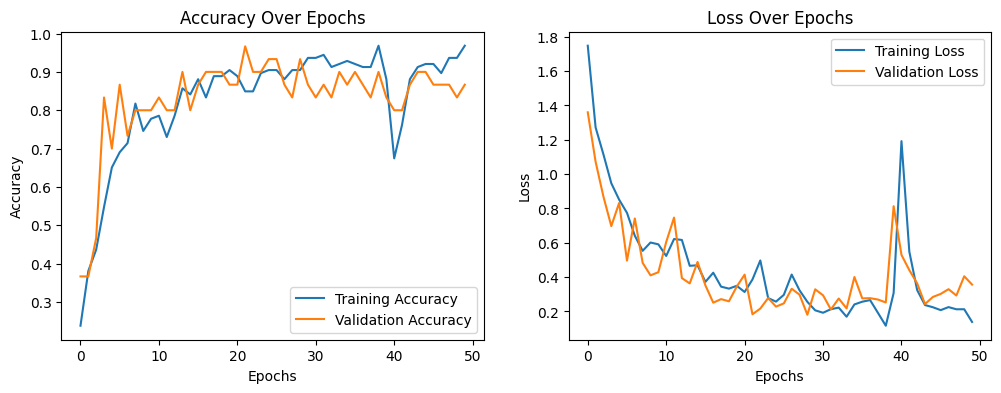

In [40]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [44]:
val_generator.reset()
prediction = cnn.predict(val_generator, verbose=1)
y_pred = np.argmax(prediction, axis=1)
y_true = val_generator.classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [45]:
print(f"Classification Report: \n\n {classification_report(y_true, y_pred, target_names=class_names)}")

Classification Report: 

                precision    recall  f1-score   support

   Black Soil       0.17      0.14      0.15         7
  Cinder Soil       0.29      0.33      0.31         6
Laterite Soil       0.20      0.17      0.18         6
    Peat Soil       0.50      0.50      0.50         6
  Yellow Soil       0.17      0.20      0.18         5

     accuracy                           0.27        30
    macro avg       0.26      0.27      0.27        30
 weighted avg       0.26      0.27      0.26        30



In [46]:
val_loss, val_acc = cnn.evaluate(val_generator, verbose=1)
print(f"Overall Validation Accuracy: {val_acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9100 - loss: 0.2383
Overall Validation Accuracy: 90.00%


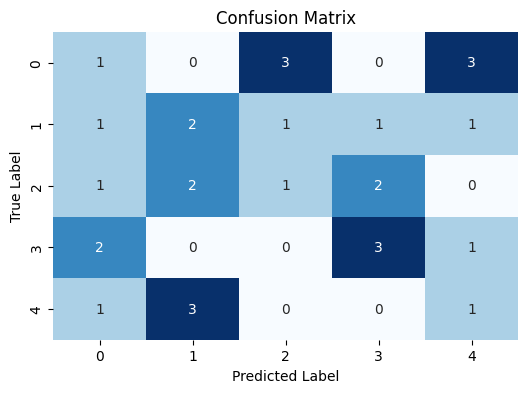

In [47]:
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Crop Recommendation Mapping**

In [48]:
soil_crops = {
    'Black Soil': ['Cotton', 'Soybean', 'Sunflower', 'Millets', 'Sorghum'],
    'Cinder Soil': ['Tobacco', 'Groundnut', 'Cotton'],  
    'Laterite Soil': ['Tea', 'Coffee', 'Cashew', 'Coconut', 'Rubber'],
    'Peat Soil': ['Paddy (Rice)', 'Jute', 'Sugarcane'],  
    'Yellow Soil': ['Pulses', 'Oilseeds', 'Potato', 'Maize']
}

### **Predict Soil Type from Image**

In [50]:
def predict_soil_type(image_path):
    try:
        if not os.path.exists(MODEL_PATH):
            print("Saved model not found!")
            return 
        cnn = load_model(MODEL_PATH)

        img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img)/255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = cnn.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        raw_label = class_names[predicted_class_index]
        formatted_label = raw_label.replace('_', ' ').strip().title()

        #Check if the image is from soil mapping
        is_soil_mapping = False
        for soil_type in soil_crops.keys():
            if soil_type.lower() in formatted_label.lower():
                is_soil_mapping = True
                break
        if not is_soil_mapping:
            print("Warning: This image does not appear to be from soil mapping. Please upload an image of soil.")
            return
        
        plt.figure()
        plt.imshow(load_img(image_path))
        plt.axis("off")
        plt.title(f"Predicted: {formatted_label}")
        plt.show()

        matched_soil = next((key for key in soil_crops if key.lower() == formatted_label.lower()), None)
        if matched_soil:
            print(f"{soil_crops[matched_soil]}")
        else:
            print("No crop data available for this soil type.")

    except Exception as e:
        print(f"Exception: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


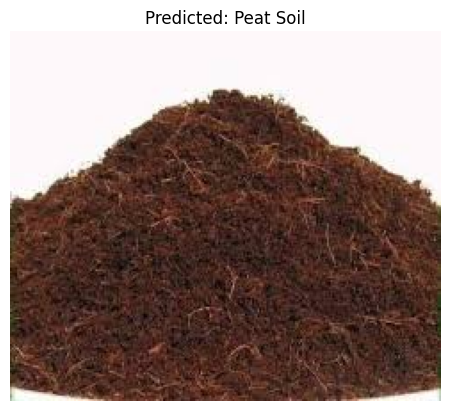

['Paddy (Rice)', 'Jute', 'Sugarcane']


In [55]:
predict_soil_type('Soil types\\Peat Soil\\20.jpg')